In [1]:
using Random
Random.seed!(13)
import Pkg
Pkg.add("Convex")
Pkg.add("ECOS")
using CSV
using Plots
using DataFrames
using Statistics
using PyPlot
using Convex, ECOS
using LowRankModels

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %>                                 ]  15.8 % %                     ]  47.4 % [==========================>              ]  63.2 %78.9 %>  ]  94.7 % Resolving package versions...
 Installed NaNMath ────────── v0.3.3
 Installed TimerOutputs ───── v0.5.3
 Installed Calculus ───────── v0.5.1
 Installed Parsers ────────── v0.3.10
 Installed TableTraitsUtils ─ v1.0.1
 Installed IterTools ──────── v1.3.0
 Installed TimeZones ──────── v0.10.3
 Installed DataStructures ─── v0.17.6
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
  [49dc2e85] ↑ Calculus v0.5.0 ⇒ v0.5.1
  [864edb3b] ↑ DataStructures v0.17.5 ⇒ v0.17.6
  [c8e1da08] ↑ IterTools v1.2.0 ⇒ v1.3.0
  [77ba4419] ↑ NaNMath v0.3.2 ⇒ v0.3.3
  [69de0a69] ↑ Parsers v0.3.8 ⇒ v0.3.10
  [382cd

┌ Info: Recompiling stale cache file /Users/silviaruiz/.julia/compiled/v1.2/CSV/HHBkp.ji for CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /Users/silviaruiz/.julia/compiled/v1.2/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /Users/silviaruiz/.julia/compiled/v1.2/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /Users/silviaruiz/.julia/compiled/v1.2/LowRankModels/1HEpm.ji for LowRankModels [15d4e49f-4837-5ea3-a885-5b28bfa376dc]
└ @ Base loading.jl:1240


In [2]:
using LowRankModels 
include("proxgrad.jl")

proxgrad_const

In [3]:
employee=CSV.read("employee_survey_data.csv")
general=CSV.read("general_data.csv")
manager=CSV.read("manager_survey_data.csv")

,EmployeeID,JobInvolvement,PerformanceRating
,Int64,Int64,Int64
1,1,3,3
2,2,2,4
3,3,3,3
4,4,2,3
5,5,3,3
6,6,3,3
7,7,3,4
8,8,3,4
9,9,3,4


In [4]:
full = join(manager, employee, on = :EmployeeID)
df=join(full, general , on = :EmployeeID)

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction
,Int64,Int64,Int64,String,String
1,1,3,3,3,4
2,2,2,4,3,2
3,3,3,3,2,2
4,4,2,3,4,4
5,5,3,3,4,1
6,6,3,3,3,2
7,7,3,4,1,3
8,8,3,4,1,2
9,9,3,4,2,4


In [5]:
# let's list all available categories, as well as their datatype using the "eltype" function.
feature_names = names(df)
for i in 1:size(feature_names,1)
    println(string(i), "\t", string(feature_names[i]), "\t\t\t", string(eltype(df[!, i])))
end

1	EmployeeID			Int64
2	JobInvolvement			Int64
3	PerformanceRating			Int64
4	EnvironmentSatisfaction			String
5	JobSatisfaction			String
6	WorkLifeBalance			String
7	Age			Int64
8	Attrition			String
9	BusinessTravel			String
10	Department			String
11	DistanceFromHome			Int64
12	Education			Int64
13	EducationField			String
14	EmployeeCount			Int64
15	Gender			String
16	JobLevel			Int64
17	JobRole			String
18	MaritalStatus			String
19	MonthlyIncome			Int64
20	NumCompaniesWorked			String
21	Over18			String
22	PercentSalaryHike			Int64
23	StandardHours			Int64
24	StockOptionLevel			Int64
25	TotalWorkingYears			String
26	TrainingTimesLastYear			Int64
27	YearsAtCompany			Int64
28	YearsSinceLastPromotion			Int64
29	YearsWithCurrManager			Int64


In [6]:
B=["Over18","EmployeeID","EmployeeCount","StandardHours"]
delete!(df, :Over18)
delete!(df, :EmployeeID)
delete!(df, :EmployeeCount)
delete!(df, :StandardHours)

┌ Warning: `delete!(df::AbstractDataFrame, cols::Any)` is deprecated, use `select!(df, Not(cols))` instead.
│   caller = top-level scope at In[6]:2
└ @ Core In[6]:2
┌ Warning: `delete!(df::AbstractDataFrame, cols::Any)` is deprecated, use `select!(df, Not(cols))` instead.
│   caller = top-level scope at In[6]:3
└ @ Core In[6]:3
┌ Warning: `delete!(df::AbstractDataFrame, cols::Any)` is deprecated, use `select!(df, Not(cols))` instead.
│   caller = top-level scope at In[6]:4
└ @ Core In[6]:4
┌ Warning: `delete!(df::AbstractDataFrame, cols::Any)` is deprecated, use `select!(df, Not(cols))` instead.
│   caller = top-level scope at In[6]:5
└ @ Core In[6]:5


,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
,Int64,Int64,String,String,String
1,3,3,3,4,2
2,2,4,3,2,4
3,3,3,2,2,1
4,2,3,4,4,3
5,3,3,4,1,3
6,3,3,3,2,2
7,3,4,1,3,1
8,3,4,1,2,3
9,3,4,2,4,3


In [7]:
"This function converts strings to floating point values.
Strings that cannot be represented as a number (like NA) are converted to zeros"
function string_to_float(str)
    try
        parse(Float64, str)
    catch
       missing
    end
end

function attrition_num(str)
    if str=="Yes"
        return 1
    else
        return -1
    end
end

function attrition_num2(str)
    if str=="Yes"
        return 1
    else
        return 0
    end
end

function gender_num(str)
    if str=="Male"
        return 0
    else
        return 1
    end
end




gender_num (generic function with 1 method)

In [8]:
#This are stored as strings (we want to change them to numerical values)
labels_string=[:EnvironmentSatisfaction,:JobSatisfaction,:WorkLifeBalance,:NumCompaniesWorked,:TotalWorkingYears]

5-element Array{Symbol,1}:
 :EnvironmentSatisfaction
 :JobSatisfaction        
 :WorkLifeBalance        
 :NumCompaniesWorked     
 :TotalWorkingYears      

In [9]:
df[:,labels_string]=string_to_float.(df[:,labels_string])

┌ Warning: implicit vector broadcasting in setindex! is deprecated; use `df[:, col_inds] .= Ref(v)` broadcasting assignment to change the columns in place
│   caller = top-level scope at In[9]:1
└ @ Core In[9]:1
┌ Warning: `setindex!(df::DataFrame, new_df::DataFrame, col_inds::AbstractVector{<:ColumnIndex})` is deprecated, use `foreach((((j, colind),)->begin
│             df[!, colind] = new_df[!, j]
│         end), enumerate(col_inds))` instead.
│   caller = setindex!(::DataFrame, ::DataFrame, ::Colon, ::Array{Symbol,1}) at deprecated.jl:1584
└ @ DataFrames /Users/silviaruiz/.julia/packages/DataFrames/yH0f6/src/deprecated.jl:1584


,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,NumCompaniesWorked,TotalWorkingYears
,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,3.0,4.0,2.0,1.0,1.0
2,3.0,2.0,4.0,0.0,6.0
3,2.0,2.0,1.0,1.0,5.0
4,4.0,4.0,3.0,3.0,13.0
5,4.0,1.0,3.0,4.0,9.0
6,3.0,2.0,2.0,3.0,28.0
7,1.0,3.0,1.0,2.0,5.0
8,1.0,2.0,3.0,2.0,10.0
9,2.0,4.0,3.0,0.0,10.0


In [10]:
#Sum one to the stock level option
df.StockOptionLevel=df.StockOptionLevel.+1

4410-element Array{Int64,1}:
 1
 2
 4
 4
 3
 1
 2
 4
 1
 2
 3
 3
 1
 ⋮
 2
 1
 4
 1
 2
 2
 1
 2
 1
 1
 2
 1

In [11]:
label_cat=[:Department,:EducationField,:JobRole,:MaritalStatus] #done
label_boolean=[:Gender,:Attrition] 
label_dict_rank=[:BusinessTravel] #done
label_rank_5levels=[:Education] #done
label_rank=[:WorkLifeBalance,:EnvironmentSatisfaction,:JobSatisfaction,:JobInvolvement,:PerformanceRating,:JobLevel,:StockOptionLevel] #done
labels_real=[:NumCompaniesWorked,:TotalWorkingYears,:Age,:DistanceFromHome,:MonthlyIncome,:PercentSalaryHike,:TrainingTimesLastYear,:YearsAtCompany,:YearsSinceLastPromotion,:YearsWithCurrManager]#done

10-element Array{Symbol,1}:
 :NumCompaniesWorked     
 :TotalWorkingYears      
 :Age                    
 :DistanceFromHome       
 :MonthlyIncome          
 :PercentSalaryHike      
 :TrainingTimesLastYear  
 :YearsAtCompany         
 :YearsSinceLastPromotion
 :YearsWithCurrManager   

In [12]:
#Check that all variables are included
size(label_cat,1)+size(label_boolean,1)+size(label_dict_rank,1)+size(label_rank,1)+size(labels_real,1)+size(label_rank_5levels,1)

25

In [13]:
cats_sets = [unique(df[:, label]) for label in label_cat]

"Computes a onehot vector for every entry in column given a set of categories cats"
function onehot(column, cats=unique(column))
    n1=size(column,1)
    n2=size(cats,1)
    result = zeros(n1,n2)
    for i=1:n1
        for j=1:n2
            if column[i]==cats[j]
                result[i,j]=1 
            end
        end
    end
    result
end

onehot

In [14]:
function rankhot(column, n)
    m=size(column,1)
    result=zeros(m,n-1)
    for i=1:m
        for j=1:n-1
            if j<column[i]
                result[i,j]=1
            end
        end
    end
    return result
end

rankhot (generic function with 1 method)

In [15]:
dict_travel = Dict("Non-Travel" => 1, "Travel_Rarely" => 2, "Travel_Frequently" => 3)

Dict{String,Int64} with 3 entries:
  "Travel_Frequently" => 3
  "Travel_Rarely"     => 2
  "Non-Travel"        => 1

In [16]:
function stringhot(column,dictionary)
    n=length(dictionary)
    m=size(column,1)
    result=zeros(m,n-1)
    for i=1:m
        for j=1:n-1
            if j<dictionary[column[i]]
                result[i,j]=1
            end
        end
    end
    return result
end

stringhot (generic function with 1 method)

┌ Warning: `colwise(f, d::AbstractDataFrame)` is deprecated, use `[f(col) for col = eachcol(d)]` instead.
│   caller = top-level scope at In[17]:1
└ @ Core In[17]:1


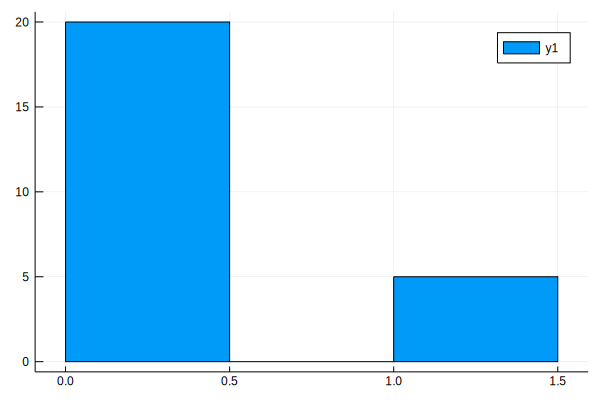

In [17]:
miss=colwise(x -> any(ismissing.(x)), df)
histogram(miss)

In [18]:
#Replace missing values with median
Label_missing=[:NumCompaniesWorked,:TotalWorkingYears,:EnvironmentSatisfaction,:JobSatisfaction,:WorkLifeBalance]
for x in Label_missing
    df[:,x]=collect( Missings.replace( df[:,x] , median(skipmissing(df[:,x])) )) 
end

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[18]:4
└ @ Core ./In[18]:4


In [20]:
function standarize(column)
    M=maximum(column)
    m=minimum(column)
    return (column.-m)./(M-m)
end

standarize (generic function with 1 method)

In [21]:
#Data standarization
for x in labels_real
    df[:,x]=standarize(df[:,x])
end

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[21]:3
└ @ Core ./In[21]:3


In [23]:
#Transform business travel:
dict_travel = Dict("Non-Travel" => 1, "Travel_Rarely" => 2, "Travel_Frequently" => 3)

Dict{String,Int64} with 3 entries:
  "Travel_Frequently" => 3
  "Travel_Rarely"     => 2
  "Non-Travel"        => 1

In [68]:
data_from_travel=stringhot(df.BusinessTravel,dict_travel)
data_from_rank=hcat(rankhot(df[:,:WorkLifeBalance],4),rankhot(df[:,:JobSatisfaction],4),rankhot(df[:,:JobInvolvement],4),rankhot(df[:,:PerformanceRating],4),rankhot(df[:,:JobLevel],4),rankhot(df[:,:StockOptionLevel],4))
data_from_education=rankhot(df[:,:Education],5)
#label_rank=[,:EnvironmentSatisfaction,:JobSatisfaction,:JobInvolvement,:PerformanceRating,:JobLevel,:StockOptionLevel] 
#data_from_rank=convert(Matrix,rankhot.(df[:,label_rank],4))
#size(label_cat,1)+size(label_boolean,1)+size(label_dict_rank,1)+size(label_rank,1)+size(labels_real,1)
#4 variables
data_from_cat = hcat([onehot(df[:, label_cat[i]], cats_sets[i]) for i in 1:size(label_cat, 1)]...)
data_from_real=convert(Matrix,df[:,labels_real])
data_gender=gender_num.(df.Gender)
target=attrition_num.(df.Attrition)
target2=attrition_num2.(df.Attrition)
data=hcat(data_from_travel,data_from_rank,data_from_education,data_from_cat,data_from_real,data_gender, ones(size(data_from_travel,1)))


4410×57 Array{Float64,2}:
 1.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  …  0.0        0.0       1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0     0.0666667  0.235294  1.0  1.0
 1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0     0.0        0.176471  0.0  1.0
 0.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0     0.466667   0.294118  0.0  1.0
 1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0     0.0        0.235294  0.0  1.0
 1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  …  0.466667   0.411765  1.0  1.0
 1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0     0.0        0.0       0.0  1.0
 1.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0     0.0        0.0       0.0  1.0
 1.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0     0.466667   0.470588  0.0  1.0
 0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0     0.0666667  0.294118  1.0  1.0
 1.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  …  0.266667   0.588235  0.0  1.0
 1.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0     0.666667   0.647059  0.0  1.0
 1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0     0.266667   0.764706  1.0  1.0
 ⋮          

In [25]:
n=size(data,1)

4410

In [26]:
target2

4410-element Array{Int64,1}:
 0
 1
 0
 0
 0
 0
 1
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 1
 0
 0
 0
 0
 0
 0
 0

In [35]:
loss= 1/n*LogisticLoss()
reg=ZeroReg()
w_logistic = proxgrad(loss, reg, data, target2, stepsize=1, maxiters=1000)

57-element Array{Float64,1}:
  0.756148461294425   
  0.8106719871856582  
 -0.9135701658158407  
 -0.33075469566779775 
  0.2510287177222807  
 -0.58775719377139    
  0.060731554366250974
 -0.5549804752620507  
 -0.20696410849118987 
 -0.24417191476720954 
  0.28539010330781134 
  0.26010431402039935 
  0.26010431402039935 
  ⋮                   
  1.0450184414946633  
 -2.0208386018563314  
 -1.4702453753940543  
 -0.13625160957686197 
 -0.22176786883016272 
  0.2625172121024659  
 -0.9195453993991574  
 -0.33153508481396776 
  1.9894704753014967  
 -1.9626548636758683  
 -0.10673159914691098 
  0.26010431402039935 

In [63]:
λ2 = 0.0001
reg2 = λ2*QuadReg()
w_logistic2 = proxgrad(loss, reg2, data, target2, stepsize=1, maxiters=1000)

57-element Array{Float64,1}:
  0.7352950616643228 
  0.7965668210861221 
 -0.8817178309135472 
 -0.32898765508187217
  0.24776370835462694
 -0.56676707879685   
  0.04926530987069542
 -0.5431215442026482 
 -0.20156206229192478
 -0.23520291283505862
  0.2764588469830604 
  0.23649503755367238
  0.23649503755367238
  ⋮                  
  0.9963201697499953 
 -1.8978808892806136 
 -1.4156467225831497 
 -0.1290251616825345 
 -0.20929684518548666
  0.2520519104795579 
 -0.8710423489407595 
 -0.3372761699622131 
  1.8215533006927682 
 -1.8473344068529698 
 -0.10397807536670929
  0.23649503755367238

In [64]:
z1 = data*w_logistic
z2 = data*w_logistic2

4410-element Array{Float64,1}:
 -3.340633652216561 
 -0.2712749495968988
 -0.9073947248139199
 -4.259868736645173 
 -0.5614324819964431
 -2.9228826684679468
  0.9013699028948715
 -1.642894207431714 
 -2.5165427432053336
 -2.999912730723781 
 -3.9089454602932556
 -3.1660788924967043
 -3.9053891223855124
  ⋮                 
 -2.212703938759313 
 -2.043398980455572 
 -3.056454677179508 
 -1.5189696446442211
 -1.740619830462429 
 -1.8901971895886356
 -2.1839968439395863
 -1.6642110940348884
 -2.453919106333078 
 -1.4153193138616067
 -2.1309973012958574
 -3.6665209621870996

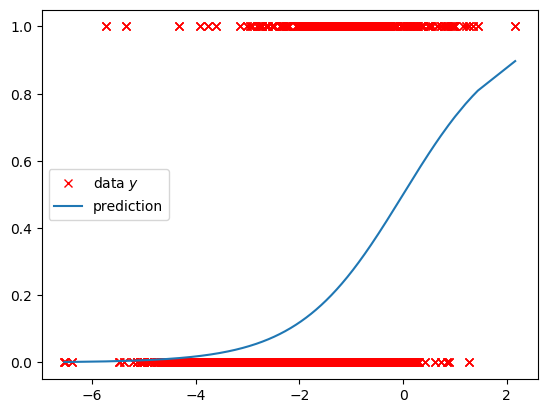

PyObject <matplotlib.legend.Legend object at 0x14e02b8d0>

In [55]:
PyPlot.plot(z1, target2, "rx", label = L"data $y$")
PyPlot.plot(sort(z1), sort(1 ./(1 .+exp.(-z1))), label = "prediction")
legend()


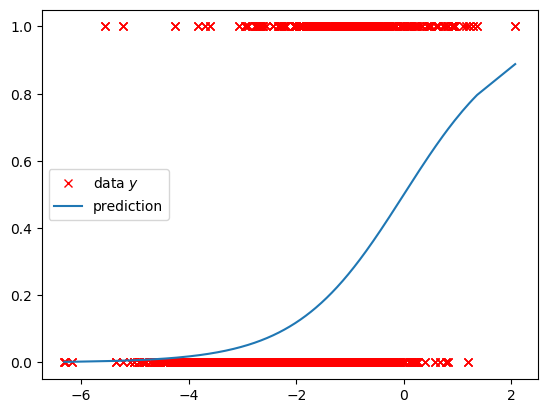

PyObject <matplotlib.legend.Legend object at 0x14edcae48>

In [65]:
PyPlot.plot(z2, target2, "rx", label = L"data $y$")
PyPlot.plot(sort(z2), sort(1 ./(1 .+exp.(-z2))), label = "prediction")
legend()

In [57]:
(n - sum((z1.>0.5) .== target2)) / n

0.15056689342403629

In [66]:
(n - sum((z2.>0.5) .== target2)) / n

0.15192743764172337

In [70]:
target

4410-element Array{Int64,1}:
 -1
  1
 -1
 -1
 -1
 -1
  1
 -1
 -1
 -1
 -1
 -1
 -1
  ⋮
 -1
 -1
 -1
 -1
  1
 -1
 -1
 -1
 -1
 -1
 -1
 -1

In [78]:
loss2 = 1/n*HingeLoss()
λ2 = 0.01
reg = λ2*QuadReg()
w_hinge = proxgrad(loss2, ZeroReg(), data, target, stepsize=1, maxiters=10000)

57-element Array{Float64,1}:
  0.006851929152401411
  0.035859878840445746
 -0.0786775900580629  
 -0.008443117287477927
  0.01107073626328806 
 -0.03363201877741827 
  0.0099324888875623  
 -0.02929321173622282 
 -0.02481134924009031 
 -0.013520341732694497
 -9.900504611616775e-5
 -0.19181733857378722 
 -0.19181733857378722 
  ⋮                   
  0.03639873084301489 
 -0.09760593500184352 
 -0.09196613156840261 
 -0.018038893683486844
 -0.031175570432532287
 -0.010732954076525494
 -0.06435374255564827 
 -0.03992068413367504 
  0.10206498400500719 
 -0.10004391200130125 
 -0.00764985083296056 
 -0.19181733857378722 

In [79]:
(n - sum(sign.(data*w_hinge) .== target)) / n

0.16122448979591836

In [122]:
size(data,1)
data2=hcat(data,target2)


4410×58 Array{Float64,2}:
 1.0  0.0  1.0  0.0  0.0  1.0  1.0  …  0.0        0.0       1.0  1.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  0.0     0.0666667  0.235294  1.0  1.0  1.0
 1.0  1.0  0.0  0.0  0.0  1.0  0.0     0.0        0.176471  0.0  1.0  0.0
 0.0  0.0  1.0  1.0  0.0  1.0  1.0     0.466667   0.294118  0.0  1.0  0.0
 1.0  0.0  1.0  1.0  0.0  0.0  0.0     0.0        0.235294  0.0  1.0  0.0
 1.0  0.0  1.0  0.0  0.0  1.0  0.0  …  0.466667   0.411765  1.0  1.0  0.0
 1.0  0.0  0.0  0.0  0.0  1.0  1.0     0.0        0.0       0.0  1.0  1.0
 1.0  0.0  1.0  1.0  0.0  1.0  0.0     0.0        0.0       0.0  1.0  0.0
 1.0  0.0  1.0  1.0  0.0  1.0  1.0     0.466667   0.470588  0.0  1.0  0.0
 0.0  0.0  1.0  1.0  0.0  0.0  0.0     0.0666667  0.294118  1.0  1.0  0.0
 1.0  0.0  1.0  1.0  0.0  1.0  1.0  …  0.266667   0.588235  0.0  1.0  0.0
 1.0  0.0  1.0  1.0  0.0  1.0  1.0     0.666667   0.647059  0.0  1.0  0.0
 1.0  0.0  1.0  1.0  0.0  0.0  0.0     0.266667   0.764706  1.0  1.0  0.0
 ⋮          

In [129]:
data3=convert(DataFrame, data2)

,x1,x2,x3,x4,x5,x6,x7,x8,x9
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
5,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
6,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
7,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
8,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
9,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [130]:
CSV.write("dataframe2.csv", data3)

"dataframe2.csv"

In [97]:
X = convert(Array,data); #features
y = convert(Array,target2);  #Y-values
## To see number of training samples
num_tr_ex = length(y); #99

In [107]:
W = param(zeros(num_tr_ex))
b = param([0.])

Tracked 1-element Array{Float64,1}:
 0.0

In [100]:
predict(x) = NNlib.σ.(x*W .+ b)

predict (generic function with 2 methods)

In [102]:
loss(x, y) = sum(binarycrossentropy.(predict(x), y))/num_tr_ex

loss (generic function with 1 method)

In [105]:
par = Params([W, b])
## Stocastic Gradient Descent with learning rate 0.01
opt = SGD(par, 0.1; decay = 0)
evalcb() = @show(loss(X, y))

evalcb (generic function with 1 method)

In [34]:
w_logistic = proxgrad(1/n*LogisticLoss(),ZeroReg(),data,target2,stepsize=1,maxiters=1000)

UndefVarError: UndefVarError: proxgrad not defined

In [71]:
#plot fit
plotdata()
plotline(w_logistic[1:2],W_lo)




UndefVarError: UndefVarError: plotdata not defined

In [62]:
function MSE(y, pred)
    return sum((y-pred).^2)/size(y,1)
end

MSE (generic function with 1 method)

In [63]:
w_linear=data\target
y_predict=data*w_linear
MSE(target,data*w_linear)

0.4612095253386309

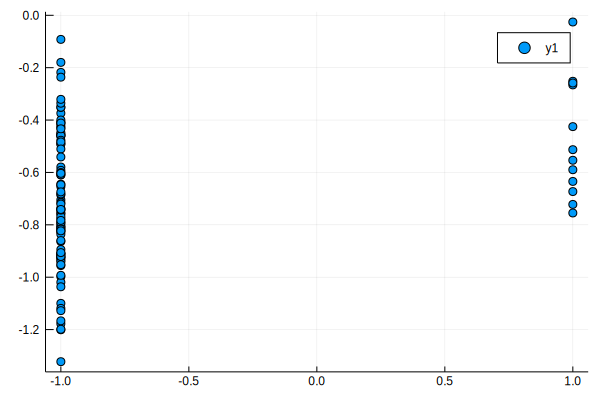

In [175]:
scatter(target[1:100],(y_predict)[1:100])

In [181]:
function perceptron(X,y;
                    maxsteps=1000, # 
                    w = rand(size(X,2))) # initial guess for w
    t=1
    running=true
    while t<maxsteps && running
        t=t+1
        running=false
        for i=1:size(X,1)
            if y[i]*transpose(w)*X[i,:]<0
                w=w+y[i]*X[i,:]
                running=true
            end
        end 
    end
    return (w,t)
end

perceptron (generic function with 1 method)

In [184]:
w_final = perceptron(data,target)[1]
y_predict=sign.(data*w_final)
MSE(target,y_predict)

0.6131519274376417

In [189]:
sum(abs.(y_predict-target))/2

676.0

In [195]:
using PyPlot
import Pkg; Pkg.add("LowRankModels")
# proximal gradient method
include("proxgrad.jl")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %44.6 %====================================>    ]  89.6 % Resolving package versions...
 Installed ScikitLearnBase ─ v0.5.0
 Installed NMF ───────────── v0.4.0
 Installed LowRankModels ─── v1.0.1
  Updating `~/.julia/environments/v1.2/Project.toml`
  [15d4e49f] + LowRankModels v1.0.1
  Updating `~/.julia/environments/v1.2/Manifest.toml`
  [15d4e49f] + LowRankModels v1.0.1
  [6ef6ca0d] + NMF v0.4.0
  [6e75b9c4] + ScikitLearnBase v0.5.0


┌ Info: Precompiling LowRankModels [15d4e49f-4837-5ea3-a885-5b28bfa376dc]
└ @ Base loading.jl:1242


proxgrad_const (generic function with 1 method)

In [191]:
"""plot line w*x+b=0"""
function plotline(w::Array{Float64,1},b::Number;
                  xmin=-100,xmax=100,
                  kwargs...)
    x1samples = [xmin, xmax]
    # w[1]*x[1]+w[2]*x[2]+b = 0
    x2samples = (-b - w[1]*x1samples)/w[2]
    plot(x1samples, x2samples, color="black", kwargs...)
end

plotline

# Loss functions for classification

In [33]:
y=target
n = length(y)
Xoffset = [data ones(n)]
loss = 1/n*HingeLoss()
w_hinge = proxgrad(loss, ZeroReg(), Xoffset, y, stepsize=1, maxiters=50000)

UndefVarError: UndefVarError: target not defined

In [2]:
print("NO")

NO